In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data/uber_cleaned.csv')
print(df.shape)
print(df.isnull().sum())
df.head()

(13953, 24)
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
long_diff            0
lat_diff             0
year                 0
month                0
day                  0
hour                 0
weekday              0
time_of_day          0
distance             0
cost_per_km          0
Country              0
State                0
City                 0
Area                 0
max_temp             0
min_temp             0
precipitation        0
snow                 0
dtype: int64


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,long_diff,lat_diff,year,month,...,distance,cost_per_km,Country,State,City,Area,max_temp,min_temp,precipitation,snow
0,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0.042478,0.031877,2009,8,...,5039.602684,2.559726,United States,New York,New York,Manhattan,27.8,20.6,0.0,0.0
1,6.5,-73.974388,40.746952,-73.988586,40.729805,1,0.014198,0.017147,2015,5,...,2250.360768,2.888426,United States,New York,New York,Manhattan,23.3,12.8,0.0,0.0
2,6.9,-73.973370,40.755193,-73.978265,40.766375,1,0.004895,0.011182,2010,4,...,1308.736085,5.272262,United States,New York,New York,Manhattan,25.6,14.4,0.0,0.0
3,4.9,-73.988908,40.756982,-73.981246,40.760050,1,0.007662,0.003068,2011,9,...,731.213369,6.701190,United States,New York,New York,Manhattan,28.3,18.9,0.0,0.0
4,10.5,-74.005665,40.741138,-73.977830,40.749338,2,0.027835,0.008200,2011,3,...,2521.093389,4.164860,United States,New York,New York,Manhattan,15.0,3.3,0.0,0.0


# Preprocessing

In [3]:
numerical = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'long_diff', 'lat_diff' ,'distance'] + ['max_temp', 'min_temp', 'precipitation', 'snow'] # 'fare_amount', 'cost_per_km' are not included
ordinal = ['year', 'month', 'day', 'hour', 'weekday']
categorical = ['Country', 'State', 'City', 'Area', 'time_of_day']


for col in ordinal:
    df[col] = df[col].astype('category')
for col in categorical:
    df[col] = df[col].astype('category')
for col in numerical:
    df[col] = df[col].astype('float64')



df.shape

(13953, 24)

## Numerical

- experiment with calculated variables - lat distance, long distance
- otherwise, apply standard scaler to everything

In [4]:
num = df[numerical]
num.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,long_diff,lat_diff,distance,max_temp,min_temp,precipitation,snow
count,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000
mean,-73.981960,40.752770,-73.980860,40.753136,1.679424,0.012954,0.014580,2095.858456,16.516341,8.528897,3.715588,2.772235
std,0.013553,0.016558,0.014242,0.017340,1.270899,0.009488,0.010452,1189.370391,10.446035,9.510804,10.055521,19.776362
min,-74.006770,40.715223,-74.007222,40.710137,1.000000,0.000490,0.000591,357.950070,-8.900000,-16.600000,0.000000,0.000000
25%,-73.991670,40.740732,-73.991118,40.740799,1.000000,0.005937,0.006884,1206.960717,7.800000,1.100000,0.000000,0.000000
50%,-73.982945,40.753448,-73.981970,40.754197,1.000000,0.010807,0.012058,1810.074770,17.800000,9.400000,0.000000,0.000000
75%,-73.973086,40.764375,-73.972316,40.765041,2.000000,0.017667,0.019744,2669.081074,25.600000,16.700000,1.300000,0.000000
max,-73.950897,40.787563,-73.946678,40.789792,6.000000,0.057983,0.063861,8528.294400,40.000000,28.900000,147.600000,312.000000


In [5]:
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler()

## Categorical

- Everything is in New York City so we only need Area
- One hot Encode this

In [6]:
cat = df[categorical]
cat.describe()

,Country,State,City,Area,time_of_day
count,13953,13953,13953,13953,13953
unique,1,1,1,3,6
top,United States,New York,New York,Manhattan,night
freq,13953,13953,13953,13924,3380


In [7]:
categorical = ['Area', 'time_of_day']

In [8]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(drop='first')

## Ordinal

In [9]:
df[ordinal].describe()

,year,month,day,hour,weekday
count,13953,13953,13953,13953,13953
unique,5,12,31,24,7
top,2009,3,15,19,4
freq,3313,1434,501,922,2185


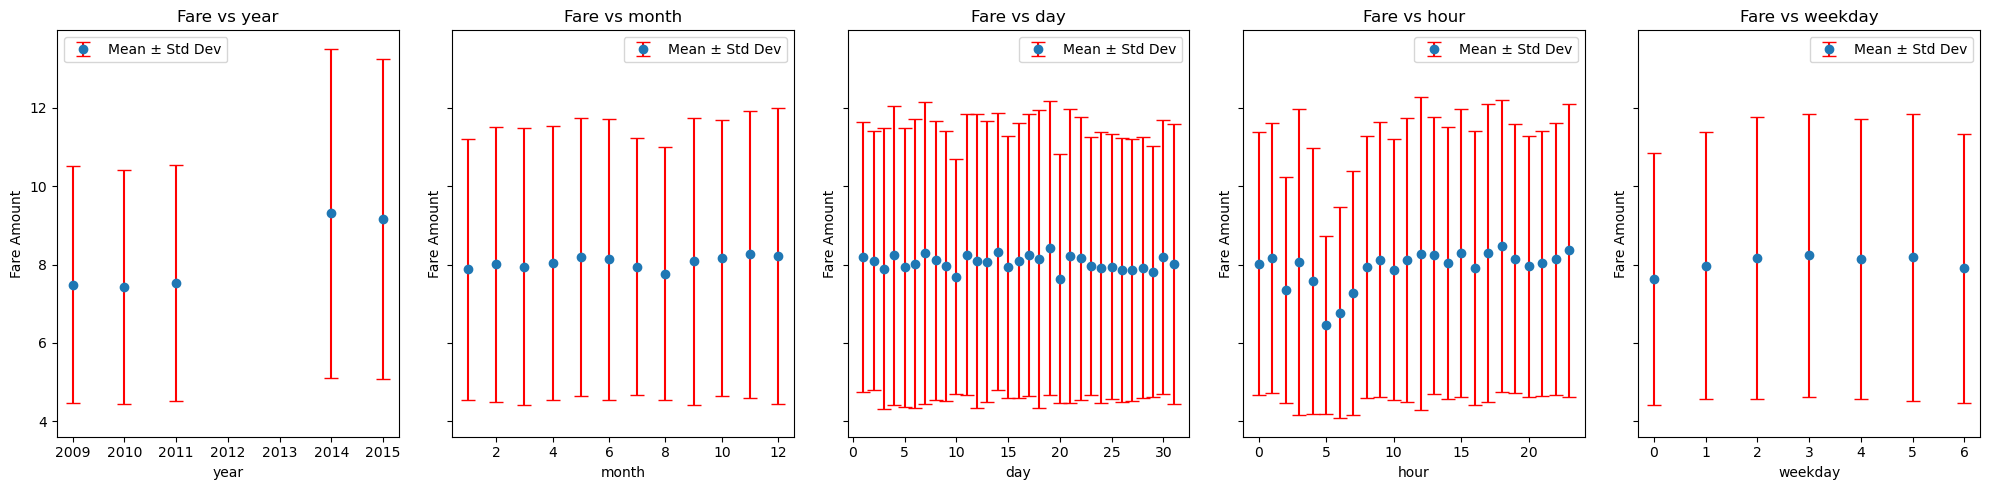

In [10]:
# lets check the variation of the fare amount with the time variables by plotting, standard deviation for each category
import matplotlib.pyplot as plt

time_df = df[['fare_amount']+ordinal]

fig, axes = plt.subplots(nrows=1, ncols=len(ordinal), figsize=(20, 5), sharey=True)

for ax, time_var in zip(axes, ordinal):
    # Group by the time variable
    grouped = time_df.groupby(time_var)['fare_amount']
    
    # Calculate mean and standard deviation
    mean = grouped.mean()
    std = grouped.std()
    
    # Plot mean and standard deviation
    ax.errorbar(mean.index, mean, yerr=std, fmt='o', ecolor='red', capsize=5, label='Mean ± Std Dev')
    
    # Set labels and title
    ax.set_title(f'Fare vs {time_var}')
    ax.set_xlabel(time_var)
    ax.set_ylabel('Fare Amount')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

- There doesnt seem to be much variation explained by the day. so we drop that

In [11]:
ordinal.remove('day')
ordinal

['year', 'month', 'hour', 'weekday']

- We encode month, hour, and weekday with sin and cos functions
- Year is treated as continuous variable which keep inscreasing, so we scale it with a minmax scaler

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class CyclicFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, period, feature_name):
        self.period = period
        self.feature_name = feature_name

    def fit(self, X, y=None):
        return self  # Nothing to fit, transformation is deterministic

    def transform(self, X):
        X = np.asarray(X)
        return np.hstack([
            np.sin(2 * np.pi * X / self.period),
            np.cos(2 * np.pi * X / self.period)
        ])

    def get_feature_names_out(self, input_features=None):
        return [f"{self.feature_name}_sin", f"{self.feature_name}_cos"]
    
month_transformer = CyclicFeatureTransformer(period=12, feature_name="month")
hour_transformer = CyclicFeatureTransformer(period=24, feature_name="hour")
weekday_transformer = CyclicFeatureTransformer(period=7, feature_name="weekday")

from sklearn.preprocessing import MinMaxScaler

year_scaler = MinMaxScaler()

## Final Column Transformer

In [13]:
X = df.drop(columns=['fare_amount', 'day', 'Country', 'State', 'City', 'cost_per_km'])

y = df['fare_amount']

In [14]:
# import column transformer
from sklearn.compose import ColumnTransformer

# import pipeline
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        # numerical and cetegorical
        ('num', num_scaler, numerical),
        ('cat', cat_encoder, categorical),

        # time variables
        ('year', year_scaler, ['year']),
        ('month', month_transformer, ['month']),
        ('hour', hour_transformer, ['hour']),
        ('weekday', weekday_transformer, ['weekday'])
    ],

)

X_processed = pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out())
X_processed.head()

,num__pickup_longitude,num__pickup_latitude,num__dropoff_longitude,num__dropoff_latitude,num__passenger_count,num__long_diff,num__lat_diff,num__distance,num__max_temp,num__min_temp,...,cat__time_of_day_evening rush hour,cat__time_of_day_morning rush hour,cat__time_of_day_night,year__year,month__month_sin,month__month_cos,hour__hour_sin,hour__hour_cos,weekday__weekday_sin,weekday__weekday_cos
0,-1.703308,-0.724722,1.284649,1.125243,-0.534620,3.111710,1.654941,2.475133,1.080225,1.269244,...,0.0,0.0,1.0,0.000000,-0.866025,-5.000000e-01,-0.707107,0.707107,0.000000,1.000000
1,0.558689,-0.351359,-0.542491,-1.345517,-0.534620,0.131174,0.245651,0.129907,0.649424,0.449095,...,1.0,0.0,0.0,1.000000,0.500000,-8.660254e-01,-0.965926,-0.258819,-0.433884,-0.900969
2,0.633816,0.146349,0.182246,0.763528,-0.534620,-0.849347,-0.325058,-0.661821,0.869611,0.617331,...,0.0,0.0,1.0,0.166667,0.866025,-5.000000e-01,-0.500000,0.866025,0.781831,0.623490
3,-0.512720,0.254395,-0.027070,0.398756,-0.534620,-0.557719,-1.101366,-1.147409,1.128091,1.090494,...,0.0,1.0,0.0,0.333333,-1.000000,-1.836970e-16,0.707107,-0.707107,0.433884,-0.900969
4,-1.749205,-0.702496,0.212790,-0.219020,0.252253,1.568412,-0.610361,0.357542,-0.145165,-0.549805,...,0.0,0.0,0.0,0.333333,1.000000,6.123234e-17,-0.258819,0.965926,-0.974928,-0.222521


# Predictive model

In [15]:
X.shape, y.shape

((13953, 18), (13953,))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(numerical)
print(ordinal)
print(categorical)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'long_diff', 'lat_diff', 'distance', 'max_temp', 'min_temp', 'precipitation', 'snow']
['year', 'month', 'hour', 'weekday']
['Area', 'time_of_day']


In [17]:
def evaluate_model(y_pred, y_true=y_test):
    # mae
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_true, y_pred)

    # rmse
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # r2
    from sklearn.metrics import r2_score
    r2 = r2_score(y_true, y_pred)

    # mape
    from sklearn.metrics import mean_absolute_percentage_error
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return{'mae': mae, 'rmse': rmse, 'r2': r2, 'mape': mape}

def visualise_preds(y_pred, y_true=y_test):
    fig = px.scatter(x=y_true, y=y_pred, title='Predictions vs True Values', labels={'x': 'True Values', 'y': 'Predictions'})
    # add a line
    fig.add_shape(
        type='line',
        # make it red
        line_color='red',
        x0=y_true.min(), y0=y_true.min(),
        x1=y_true.max(), y1=y_true.max()
    )
    fig.show()
    

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', lr)
    ]
)

lr_pipe.fit(X_train, y_train)

y_pred = lr_pipe.predict(X_test)

lr_eval = evaluate_model(y_pred)
visualise_preds(y_pred)
lr_eval



{'mae': 1.2178742778407914,
 'rmse': 1.7175755064521947,
 'r2': 0.7605183372138025,
 'mape': 0.1558067555558803}

## Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=1000,
    criterion='squared_error', # {'squared_error', 'absolute_error', 'friedman_mse', 'poisson'}
    max_depth=6,
    min_samples_leaf=2,
    min_impurity_decrease=0.0,
    bootstrap=True,
    max_samples=0.7,

    n_jobs=-1,
    random_state=42
)

rf_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', rf)
    ]
)

rf_pipe.fit(X_train, y_train)

y_pred = rf_pipe.predict(X_test)

rf_eval=evaluate_model(y_pred)
visualise_preds(y_pred)
rf_eval

{'mae': 1.191396303781317,
 'rmse': 1.704628835491909,
 'r2': 0.764115040709589,
 'mape': 0.14818906952241806}

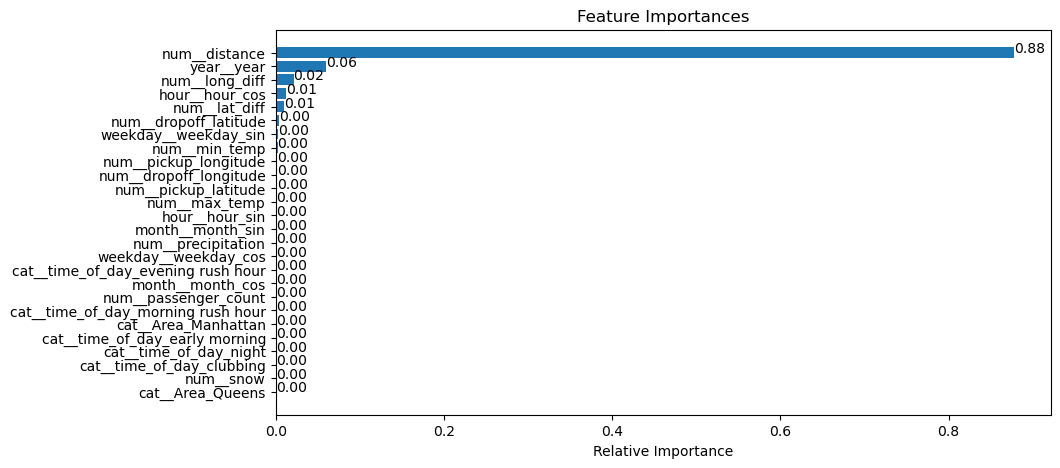

In [20]:
# plot feature importance
importances = rf_pipe.named_steps['model'].feature_importances_
features = rf_pipe.named_steps['preprocessor'].get_feature_names_out()
indices = np.argsort(importances)

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# add numbers to each column
for index, value in enumerate(importances[indices]):
    plt.text(value, index, f'{value:.2f}')

plt.show()

## Kernel-Ridge Regression

In [21]:
from sklearn.kernel_ridge import KernelRidge

kr = KernelRidge(
    alpha=1,
    kernel='rbf', #[‘additive_chi2’, ‘chi2’, ‘linear’, ‘poly’, ‘polynomial’, ‘rbf’, ‘laplacian’, ‘sigmoid’, ‘cosine’]
    gamma=None,
    degree=3,
    coef0=1,
    kernel_params=None
)

kr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', kr)
    ]
)

kr_pipe.fit(X_train, y_train)

y_pred = kr_pipe.predict(X_test)

kr_eval = evaluate_model(y_pred)
visualise_preds(y_pred)
kr_eval

{'mae': 1.092856516603427,
 'rmse': 1.6108589213749074,
 'r2': 0.7893528430844425,
 'mape': 0.1359165014980346}

## Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

lsr = Lasso(
    alpha=1.0,
    fit_intercept=True,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic'
)

lsr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', lsr)
    ]
)

lsr_pipe.fit(X_train, y_train)

y_pred = lsr_pipe.predict(X_test)

lsr_eval = evaluate_model(y_pred)
visualise_preds(y_pred)
lsr_eval

{'mae': 1.563903821007338,
 'rmse': 2.1921719077368325,
 'r2': 0.6098875553420842,
 'mape': 0.2124974929187996}

In [23]:
X.shape, y.shape

((13953, 18), (13953,))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(numerical)
print(ordinal)
print(categorical)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'long_diff', 'lat_diff', 'distance', 'max_temp', 'min_temp', 'precipitation', 'snow']
['year', 'month', 'hour', 'weekday']
['Area', 'time_of_day']


In [25]:
def evaluate_model(y_pred, y_true=y_test):
    # mae
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_true, y_pred)

    # rmse
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # r2
    from sklearn.metrics import r2_score
    r2 = r2_score(y_true, y_pred)

    # mape
    from sklearn.metrics import mean_absolute_percentage_error
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return{'mae': mae, 'rmse': rmse, 'r2': r2, 'mape': mape}

def visualise_preds(y_pred, y_true=y_test):
    fig = px.scatter(x=y_true, y=y_pred, title='Predictions vs True Values', labels={'x': 'True Values', 'y': 'Predictions'})
    # add a line
    fig.add_shape(
        type='line',
        # make it red
        line_color='red',
        x0=y_true.min(), y0=y_true.min(),
        x1=y_true.max(), y1=y_true.max()
    )
    fig.show()
    

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', lr)
    ]
)

lr_pipe.fit(X_train, y_train)

y_pred = lr_pipe.predict(X_test)

lr_eval = evaluate_model(y_pred)
visualise_preds(y_pred)
lr_eval



{'mae': 1.2178742778407914,
 'rmse': 1.7175755064521947,
 'r2': 0.7605183372138025,
 'mape': 0.1558067555558803}

## Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=1000,
    criterion='squared_error', # {'squared_error', 'absolute_error', 'friedman_mse', 'poisson'}
    max_depth=6,
    min_samples_leaf=2,
    min_impurity_decrease=0.0,
    bootstrap=True,
    max_samples=0.7,

    n_jobs=-1,
    random_state=42
)

rf_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', rf)
    ]
)

rf_pipe.fit(X_train, y_train)

y_pred = rf_pipe.predict(X_test)

rf_eval=evaluate_model(y_pred)
visualise_preds(y_pred)
rf_eval

{'mae': 1.191396303781317,
 'rmse': 1.704628835491909,
 'r2': 0.7641150407095889,
 'mape': 0.14818906952241803}

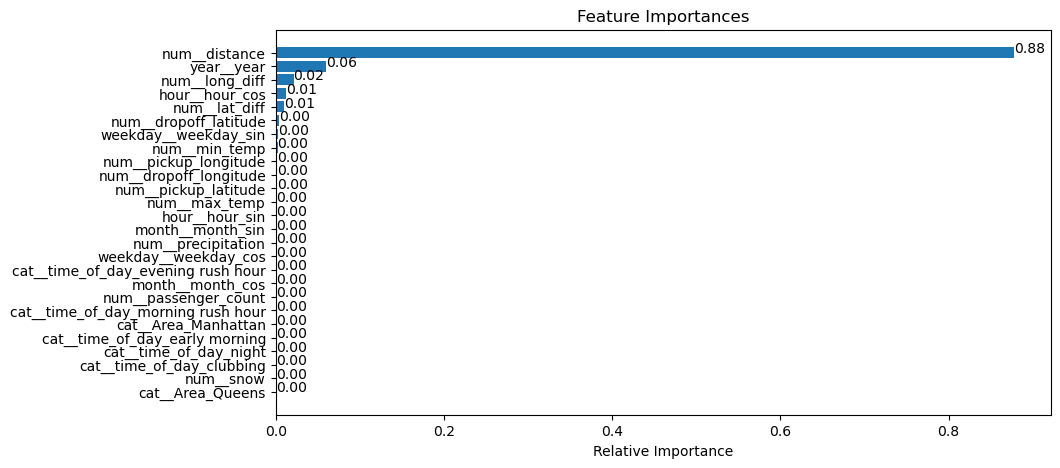

In [28]:
# plot feature importance
importances = rf_pipe.named_steps['model'].feature_importances_
features = rf_pipe.named_steps['preprocessor'].get_feature_names_out()
indices = np.argsort(importances)

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# add numbers to each column
for index, value in enumerate(importances[indices]):
    plt.text(value, index, f'{value:.2f}')

plt.show()

## Kernel-Ridge Regression

In [29]:
from sklearn.kernel_ridge import KernelRidge

kr = KernelRidge(
    alpha=1,
    kernel='rbf', #[‘additive_chi2’, ‘chi2’, ‘linear’, ‘poly’, ‘polynomial’, ‘rbf’, ‘laplacian’, ‘sigmoid’, ‘cosine’]
    gamma=None,
    degree=3,
    coef0=1,
    kernel_params=None
)

kr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', kr)
    ]
)

kr_pipe.fit(X_train, y_train)

y_pred = kr_pipe.predict(X_test)

kr_eval = evaluate_model(y_pred)
visualise_preds(y_pred)
kr_eval

{'mae': 1.092856516603427,
 'rmse': 1.6108589213749074,
 'r2': 0.7893528430844425,
 'mape': 0.1359165014980346}

## Lasso Regression

In [30]:
from sklearn.linear_model import Lasso

lsr = Lasso(
    alpha=1.0,
    fit_intercept=True,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic'
)

lsr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', lsr)
    ]
)

lsr_pipe.fit(X_train, y_train)

y_pred = lsr_pipe.predict(X_test)

lsr_eval = evaluate_model(y_pred)
visualise_preds(y_pred)
lsr_eval

{'mae': 1.563903821007338,
 'rmse': 2.1921719077368325,
 'r2': 0.6098875553420842,
 'mape': 0.2124974929187996}

# Summary

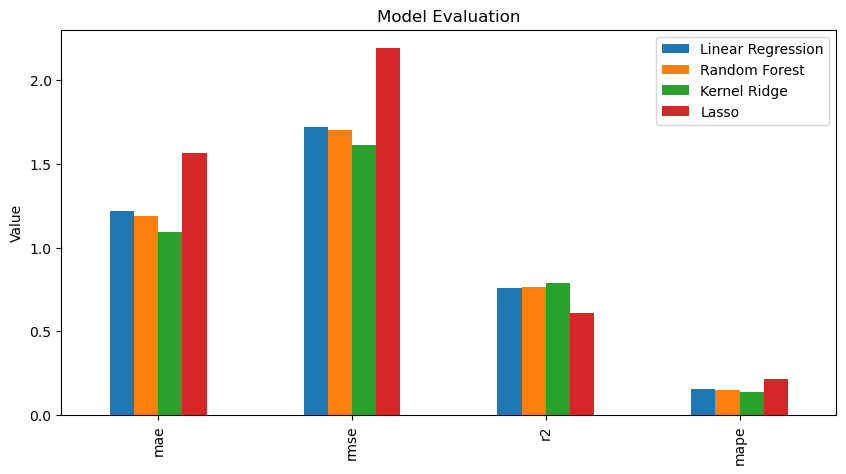

,Linear Regression,Random Forest,Kernel Ridge,Lasso
mae,1.217874,1.191396,1.092857,1.563904
rmse,1.717576,1.704629,1.610859,2.192172
r2,0.760518,0.764115,0.789353,0.609888
mape,0.155807,0.148189,0.135917,0.212497


In [31]:
summary = pd.DataFrame({
    'Linear Regression': lr_eval,
    'Random Forest': rf_eval,
    'Kernel Ridge': kr_eval,
    'Lasso': lsr_eval
})

# plot the summary on a bar graph where x is the model (columns) and y is the metric (rows)
summary.plot(kind='bar', figsize=(10, 5))
plt.ylabel('Value')
plt.title('Model Evaluation')
plt.show()
summary